### Alex Kramer - Northeastern - Summer 2023 - Homework 1 - DS 5110

In [2]:
import random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd

#### Problem 1: Further Exploring the Condorcet Model
Modify the Condorcet model simulation code given in class (posted to Canvas) so that instead of jurors being assigned a random individual accuracy from 0.50 to some maximum value, they are all assigned the same value from 0.00 to 1.00. Plot the curve for the accuracy of the majority based on 10,000 or more random trials as a function of the individual juror accuracy. Overlay three curves for 11, 21, and 31 jurors.

With 11 jurors and 10,000 trials, we see an accuracy of: 0.2973
With 21 jurors and 10,000 trials, we see an accuracy of: 0.1531
With 31 jurors and 10,000 trials, we see an accuracy of: 1.0


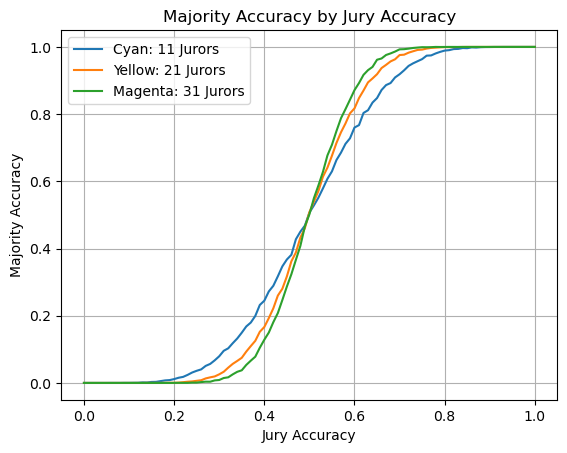

In [4]:
def accuracy(n, trials, color):
    individual_accuracy = rnd.uniform(0, 1)  # generate accuracy
    jury = [individual_accuracy] * n  # create a list of jurors with the same accuracy
    outcomes = [rnd.choice([0, 1]) for _ in range(trials)] # create outcomes using rnd
    verdicts = []
    
    # for each outcome in outcomes, create verdicts
    for out in outcomes:
        verdict = []
        for juror in jury:
            if rnd.random() < juror:
                verdict.append(out)
            else:
                verdict.append(1 - out)
        verdicts.append(max(set(verdict), key=verdict.count))

    # compute the jury majority verdict accuracy
    accuracy = sum(outcomes[i] == verdicts[i] for i in range(len(outcomes))) / len(outcomes)
    print('With', len(jury), 'jurors and 10,000 trials, we see an accuracy of:', accuracy)

    # calculate majority accuracy for different jury accuracies
    jury_accuracies = [i / 100 for i in range(101)]  # range from 0 to 1 with a step of 0.01
    majority_accuracies = []

    # for the whole jury append each individual verdict 
    for juror_accuracy in jury_accuracies:
        jury = [juror_accuracy] * n
        verdicts = []
        for out in outcomes:
            verdict = []
            for juror in jury:
                if rnd.random() < juror:
                    verdict.append(out)
                else:
                    verdict.append(1 - out)
            verdicts.append(max(set(verdict), key=verdict.count))
            
        # calculate majority vote
        majority_accuracy = sum(outcomes[i] == verdicts[i] for i in range(len(outcomes))) / len(outcomes)
        majority_accuracies.append(majority_accuracy)
    
    # plot jury accuracy by majority accuracy
    plt.plot(jury_accuracies, majority_accuracies)
    
def main():
    # 11 jurors
    accuracy(11, 10000, 'c')
    # 21 jurors
    accuracy(21, 10000, 'y')
    # 31 jurors
    accuracy(31, 10000, 'm')
    
    # plot / make graph look nice
    plt.xlabel('Jury Accuracy')
    plt.ylabel('Majority Accuracy')
    plt.title('Majority Accuracy by Jury Accuracy')
    plt.legend(['Cyan: 11 Jurors', "Yellow: 21 Jurors", "Magenta: 31 Jurors"])
    plt.grid(True)
    plt.show()
    
if __name__ == '__main__':
    main()

#### Problem 2: Modeling Infection
Imagine N students sitting in a row in a large classroom. Some fraction of the students, Psick , are infected with the 24-hour flu. Model the transmission of the flu from day to day using an MxN array, where N is the number of students, and M is the number of days to be simulated.Who is infected from day to day is determined by the following rules:
a. If a person sick, they are healthy the next day, but may again catch the flu from one of their sick neighbors the day after that. (There is no long-term immunity.)
b. If a person is sick, they transmit the flu to the person on their left or their right each with probability Pinfect. So, one or both adjacent neighbors may become infected and show up as sick the next day. Visualize the course of the disease day by day using your MxN array. In the array, 0=healthy and 1=infected. Can you find a value of Pinfect where the disease persists in the population without simply dying out (everyone becomes healthy or everyone becomes infected?) I recommend you try N=1000, M=1000, Psick = 0.15.
c. Plot the % of students that are sick as a function of time for three different values of Pinfect .

Day 1: [0. 1. 0. 0. 0.]
Day 2: [1. 0. 1. 0. 0.]
Day 3: [0. 1. 0. 1. 0.]
Day 4: [1. 0. 1. 0. 1.]
Day 5: [0. 1. 0. 1. 0.]
Day 6: [1. 0. 1. 0. 1.]
Day 7: [0. 1. 0. 1. 0.]
Day 8: [1. 0. 1. 0. 1.]
Day 9: [0. 1. 0. 1. 0.]
Day 10: [1. 0. 1. 0. 1.]
Pinfect:  0.0078125


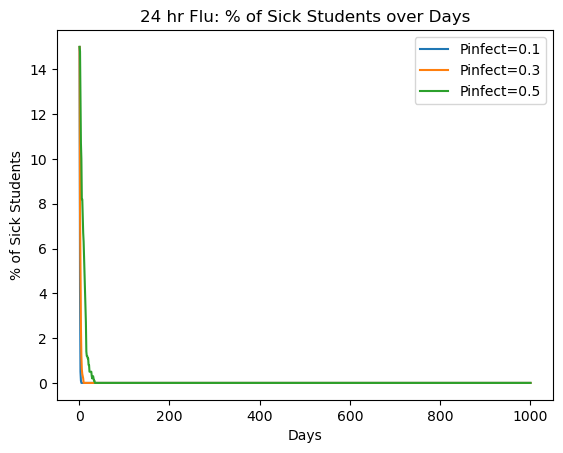

In [38]:
def simulate(N, M, Psick):
    # function simulates flu, taking in number of students, number of days
    # and probability of sick
    
    classroom = np.zeros((M, N)) # create our classroom (students by days)

    # randomly choose who gets sick first
    sick_students = np.random.choice(N, size=int(N * Psick), replace=False) 
    classroom[0, sick_students] = 1 # change the array to include sick students
    
    # in the array, for each day (row) and each student 
    for day in range(1, M):
        for student in range(N):
            # check to see if they were sick the day before
            if classroom[day-1, student] == 1:
                # if they were, make them healthy today
                classroom[day, student] = 0
                # if they were healthy, check to see if their neighbords were sick
                if student > 0 and classroom[day-1, student-1] == 0:
                    classroom[day, student-1] = 1
                if student < N-1 and classroom[day-1, student+1] == 0:
                    classroom[day, student+1] = 1

    return classroom

def pinfect(N, M, Psick):
    
    min_pinfect = 0.0
    max_pinfect = 1.0
    epsilon = 0.01

    while max_pinfect - min_pinfect > epsilon:
        Pinfect = (min_pinfect + max_pinfect) / 2
        classroom = simulate_flu_transmission(N, M, Psick, Pinfect)
        if np.any(classroom[-1] == 1):
            min_pinfect = Pinfect
        else:
            max_pinfect = Pinfect

    return Pinfect

def plot(N, M, Psick, Pinfect_values):
    # function plots the sick students % and the pinfect values
    sick_percentages = []
    
    # calculte the number of students sick in each simulation 
    for Pinfect in Pinfect_values:
        classroom = simulate_flu_transmission(N, M, Psick, Pinfect)
        sick_count = np.sum(classroom, axis=1)
        sick_percentage = (sick_count / N) * 100
        sick_percentages.append(sick_percentage)

    # plot the graph
    plt.figure()
    for i, Pinfect in enumerate(Pinfect_values):
        plt.plot(range(1, M+1), sick_percentages[i], label=f"Pinfect={Pinfect}")
    plt.xlabel("Days")
    plt.ylabel("% of Sick Students")
    plt.title("24 hr Flu: % of Sick Students over Days")
    plt.legend()
    plt.show()
    
def main():
    # 10 days, 5 students
    classroom = simulate(5, 10, 0.2)

    # print the indidivudal days,  day by day to vizulize simulation
    for day in range(10):
        print(f"Day {day+1}: {classroom[day]}")
        
    N = 1000  # number of students
    M = 1000  # number of days to simulate
    Psick = 0.15  # percent of infected students

    # find the Pinfect
    Pinfect_persistent = pinfect(N, M, Psick)
    print('Pinfect: ', Pinfect_persistent)

    # run simulation with the persistent Pinfect and then plot
    classroom = simulate(N, M, Psick)
    Pinfect_values = [0.1, 0.3, 0.5]
    plot(N, M, Psick, Pinfect_values)
    
if __name__ =='__main__':
    main()

#### Problem 3: The Trees of Boston
The file trees.csv contains the GPS location of over 200,000 trees in the City of Boston. Create a map of the trees of Boston by mapping the GPS-coordinates of each tree to the Boston City Map shapefile. Your map should represent the following area encompassing the city of Boston:
Latitude: 42.2 to 42.4 degrees North
Longitude: -71.2 to -70.9 degrees West
Remember that location (0,0) in the array is the North-West corner of the map, and location (999,999) is the South-East corner of the map.

Text(0.5, 1.0, 'Boston Trees')

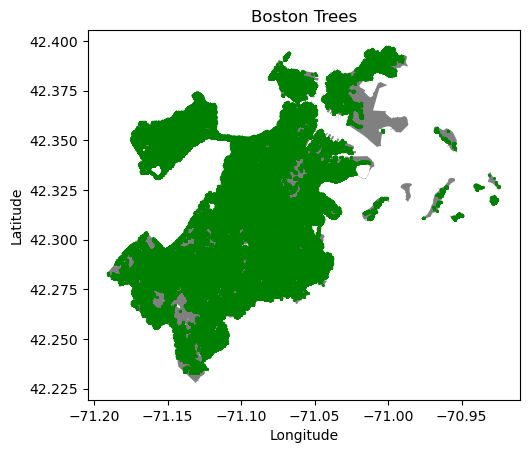

In [3]:
# Import shapefile of the City of Boston
df_bos_map = gpd.read_file('City_of_Boston_Boundary.shp')
df_bos_map = df_bos_map.to_crs(epsg=4326)
# Plot shapefile
ax = df_bos_map.plot(color='gray')

# Read in Boston Tree Data
df = pd.read_csv('trees.csv')
# Create geometry points from X,Y 
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X, df.Y), crs="EPSG:4326")

# Plot points over city map
gdf.plot(ax=ax, legend=True,marker='*', color='green', markersize=2)

# Display lables 
plt.xlabel('Longitude')
plt.ylabel("Latitude")
plt.title('Boston Trees')